##Method 2 :  TF-IDF with Cosine Similarity (More accurate approach)


In [19]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

# Load the dataset
train_data_path = '/content/drive/My Drive/data-train.csv'
train_df = pd.read_csv(train_data_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Remove duplicates and then Calculate TF-IDF vectors
###First, import required libraries and remove the duplicates

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
import pandas as pd

# Remove essays containing "PROPER_NAME" and remove duplicates
print("Filtering the dataset...")
filtered_df = train_df[~train_df['full_text'].str.contains("PROPER_NAME", na=False)].drop_duplicates(subset='full_text')

# Set sampled_df to the entire filtered dataset instead of taking a sample
sampled_df = filtered_df.reset_index(drop=True)

essays = sampled_df['full_text']

# TF-IDF vectors
print("Creating TF-IDF vectors...")
vectorizer = TfidfVectorizer(max_features=10000)
tfidf_vectors = vectorizer.fit_transform(essays)

Filtering the dataset...
Creating TF-IDF vectors...
Finding nearest neighbors using cosine similarity...

Top Similar Pairs of Essays (TF-IDF Cosine Similarity):
Pair 1: Essay IDs 29aa983 and 6d25307 with Similarity Score: 0.8923
Pair 2: Essay IDs 6d25307 and 29aa983 with Similarity Score: 0.8923
Pair 3: Essay IDs 7f55753 and 9985008 with Similarity Score: 0.8763
Pair 4: Essay IDs 9985008 and 7f55753 with Similarity Score: 0.8763
Pair 5: Essay IDs 4d0c575 and e026924 with Similarity Score: 0.8674
Pair 6: Essay IDs e026924 and 4d0c575 with Similarity Score: 0.8674
Pair 7: Essay IDs 7cdf8b2 and 84a1b1a with Similarity Score: 0.8593
Pair 8: Essay IDs 84a1b1a and 7cdf8b2 with Similarity Score: 0.8593
Pair 9: Essay IDs 3a9c6cf and ef95422 with Similarity Score: 0.8559
Pair 10: Essay IDs ef95422 and 3a9c6cf with Similarity Score: 0.8559


#Using NearestNeighbors Model with Cosine similarity to get top 10 similar pairs
###To find the most similar essays, the code uses NearestNeighbors from sklearn.neighbors, specifying cosine distance as the metric.
A distance of 0 means two vectors are identical.

In [16]:
# Use NearestNeighbors to find the closest essays
print("Finding nearest neighbors using cosine similarity...")
num_neighbors = 11  # Include 10 nearest neighbors + the essay itself
nbrs = NearestNeighbors(n_neighbors=num_neighbors, metric='cosine').fit(tfidf_vectors)

# Get the nearest neighbors (including distances)
distances, indices = nbrs.kneighbors(tfidf_vectors)

# Extract the top 10 similar pairs, excluding self-pairs (distance of 0)
top_similar_pairs = []

for i in range(distances.shape[0]):
    for j in range(1, num_neighbors):
        if distances[i, j] < 1.0:
            similarity_score = 1 - distances[i, j]  # Convert cosine distance back to similarity
            top_similar_pairs.append((i, indices[i, j], similarity_score))

# Sort by similarity score in descending order and get the top 10 pairs
num_top_pairs = 10
top_similar_pairs = sorted(top_similar_pairs, key=lambda x: -x[2])[:num_top_pairs]

#Print the top similar pairs with their essay IDs
print("\nTop Similar Pairs of Essays (TF-IDF Cosine Similarity):")
for idx, (i, j, similarity) in enumerate(top_similar_pairs):
    essay_id_1, essay_id_2 = sampled_df.loc[i, 'essay_id'], sampled_df.loc[j, 'essay_id']
    preview_1, preview_2 = sampled_df.loc[i, 'full_text'][:150], sampled_df.loc[j, 'full_text'][:150]
    print(f"Pair {idx + 1}: Essay IDs {essay_id_1} and {essay_id_2} with Similarity Score: {similarity:.4f}")
    print(f"Essay {essay_id_1} (Preview): {preview_1[:150]}...")
    print(f"Essay {essay_id_2} (Preview): {preview_2[:150]}...\n")


Finding nearest neighbors using cosine similarity...

Top Similar Pairs of Essays (TF-IDF Cosine Similarity):
Pair 1: Essay IDs 29aa983 and 6d25307 with Similarity Score: 0.8923
Essay 29aa983 (Preview): A new hom

whould you send someone to explore venus with the technology that we haave

right now? the author of the article

the challege of exploring...
Essay 6d25307 (Preview): Benefits of Researching a New planet

Whould you send someone to explore venus with even if we don't have the technology necessary?The author of the a...

Pair 2: Essay IDs 6d25307 and 29aa983 with Similarity Score: 0.8923
Essay 6d25307 (Preview): Benefits of Researching a New planet

Whould you send someone to explore venus with even if we don't have the technology necessary?The author of the a...
Essay 29aa983 (Preview): A new hom

whould you send someone to explore venus with the technology that we haave

right now? the author of the article

the challege of exploring...

Pair 3: Essay IDs 7f55753 and 998500

###Visualization of similarities among the top 10 similar pairs


Calculating the cosine similarity matrix for the subset of essays...


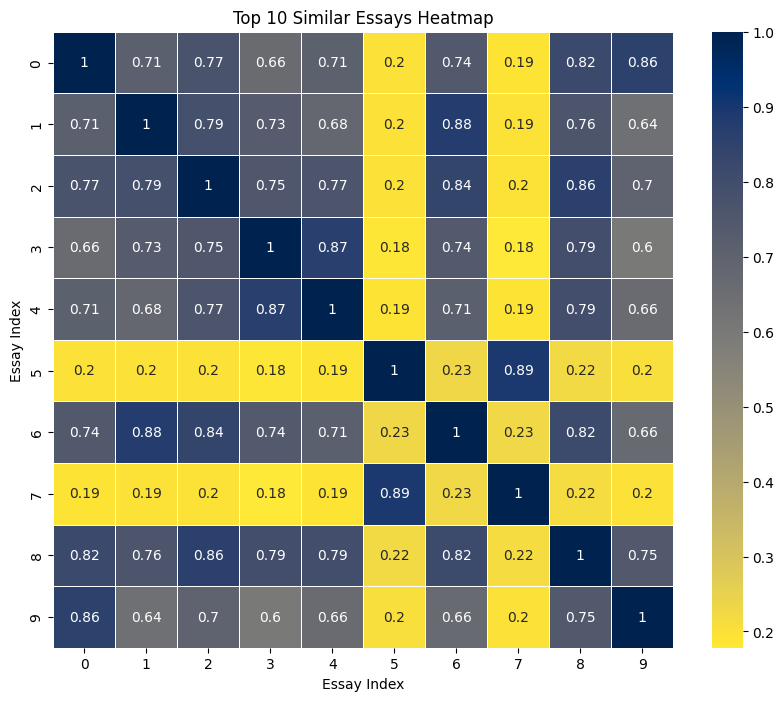

In [18]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

top_indices = list(set([index for pair in top_similar_pairs for index in pair[:2]]))

print("Calculating the cosine similarity matrix for the subset of essays...")
subset_vectors = tfidf_vectors[top_indices]
subset_similarity_matrix = cosine_similarity(subset_vectors)

plt.figure(figsize=(10, 8))
sns.heatmap(subset_similarity_matrix, annot=True, cmap='cividis_r', linewidths=0.5)
plt.title('Top 10 Similar Essays Heatmap')
plt.xlabel('Essay Index')
plt.ylabel('Essay Index')

# Display the heatmap
plt.show()
